In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitiude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
        
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities) 

640

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=974fd867c22fe5fa732db5571be46944


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list ot hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in set of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | palmer
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | brazzaville
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | port-gentil
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | sola
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | lubliniec
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | kiunga
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | kamaishi
Processing Record 22 of Set 1 | opuwo
Processing Record 23 of

Processing Record 42 of Set 4 | bontang
Processing Record 43 of Set 4 | hobyo
Processing Record 44 of Set 4 | kruisfontein
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | muisne
Processing Record 47 of Set 4 | zhitikara
City not found. Skipping...
Processing Record 48 of Set 4 | macamic
Processing Record 49 of Set 4 | kananga
Processing Record 50 of Set 4 | dongsheng
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | manoel urbano
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | ferrol
Processing Record 5 of Set 5 | kahului
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | fuyang
Processing Record 8 of Set 5 | tual
Processing Record 9 of Set 5 | amderma
City not found. Skipping...
Processing Record 10 of Set 5 | boo
Processing Record 11 of Set 5 | yining
Processing Record 12 of Set 5 | hami
Processing Record 13 of Set 5 | moron
Processing Record 14 of Set 5 | pandamatenga
Processing Record 15

Processing Record 30 of Set 8 | cabo san lucas
Processing Record 31 of Set 8 | richards bay
Processing Record 32 of Set 8 | pangnirtung
Processing Record 33 of Set 8 | nacala
Processing Record 34 of Set 8 | nantucket
Processing Record 35 of Set 8 | miraflores
Processing Record 36 of Set 8 | sol-iletsk
Processing Record 37 of Set 8 | weyburn
Processing Record 38 of Set 8 | srednekolymsk
Processing Record 39 of Set 8 | lompoc
Processing Record 40 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 41 of Set 8 | gibraltar
Processing Record 42 of Set 8 | grand centre
City not found. Skipping...
Processing Record 43 of Set 8 | chuy
Processing Record 44 of Set 8 | forbes
Processing Record 45 of Set 8 | praya
Processing Record 46 of Set 8 | lagoa
Processing Record 47 of Set 8 | sovetskaya gavan
Processing Record 48 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 49 of Set 8 | bandarbeyla
Processing Record 50 of Set 8 | macia
Processing Record 1 of Set 9 | poli


Processing Record 18 of Set 12 | mabaruma
Processing Record 19 of Set 12 | jiuquan
Processing Record 20 of Set 12 | port-cartier
Processing Record 21 of Set 12 | wynyard
Processing Record 22 of Set 12 | zapolyarnyy
Processing Record 23 of Set 12 | tornio
Processing Record 24 of Set 12 | coihaique
Processing Record 25 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 26 of Set 12 | eyl
Processing Record 27 of Set 12 | la ronge
Processing Record 28 of Set 12 | normandin
Processing Record 29 of Set 12 | makakilo city
Processing Record 30 of Set 12 | maun
Processing Record 31 of Set 12 | vidalia
Processing Record 32 of Set 12 | itarema
Processing Record 33 of Set 12 | zyryanka
Processing Record 34 of Set 12 | lukang
Processing Record 35 of Set 12 | saldanha
Processing Record 36 of Set 12 | canton
Processing Record 37 of Set 12 | uglich
Processing Record 38 of Set 12 | acapulco
Processing Record 39 of Set 12 | kokopo
Processing Record 40 of Set 12 | aberdeen
Processin

In [9]:
len(city_data)

592

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,48.20,57,20,25.28,AR,2020-10-11 21:38:34
1,Vaini,-21.20,-175.20,77.00,78,20,10.29,TO,2020-10-11 21:38:34
2,Kapaa,22.08,-159.32,86.00,66,40,12.75,US,2020-10-11 21:38:34
3,Palmer,42.16,-72.33,60.80,36,75,9.17,US,2020-10-11 21:34:05
4,Butaritari,3.07,172.79,80.96,74,24,13.71,KI,2020-10-11 21:38:35
5,Brazzaville,-4.27,15.28,78.80,69,100,5.82,CG,2020-10-11 21:36:47
6,Port-Gentil,-0.72,8.78,77.00,94,90,9.17,GA,2020-10-11 21:33:52
7,Atuona,-9.80,-139.03,78.49,71,3,19.89,PF,2020-10-11 21:38:36
8,Sola,-13.88,167.55,84.20,83,75,6.93,VU,2020-10-11 21:38:36
9,Hermanus,-34.42,19.23,55.99,69,46,5.99,ZA,2020-10-11 21:38:36


In [11]:
# Reorder the columns of the DataFrame
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-10-11 21:38:34,-54.80,-68.30,48.20,57,20,25.28
1,Vaini,TO,2020-10-11 21:38:34,-21.20,-175.20,77.00,78,20,10.29
2,Kapaa,US,2020-10-11 21:38:34,22.08,-159.32,86.00,66,40,12.75
3,Palmer,US,2020-10-11 21:34:05,42.16,-72.33,60.80,36,75,9.17
4,Butaritari,KI,2020-10-11 21:38:35,3.07,172.79,80.96,74,24,13.71
5,Brazzaville,CG,2020-10-11 21:36:47,-4.27,15.28,78.80,69,100,5.82
6,Port-Gentil,GA,2020-10-11 21:33:52,-0.72,8.78,77.00,94,90,9.17
7,Atuona,PF,2020-10-11 21:38:36,-9.80,-139.03,78.49,71,3,19.89
8,Sola,VU,2020-10-11 21:38:36,-13.88,167.55,84.20,83,75,6.93
9,Hermanus,ZA,2020-10-11 21:38:36,-34.42,19.23,55.99,69,46,5.99


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/11/20'

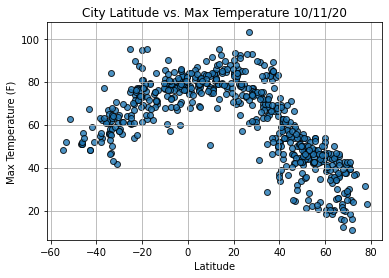

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

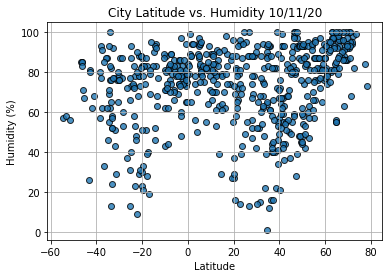

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime('%x'))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

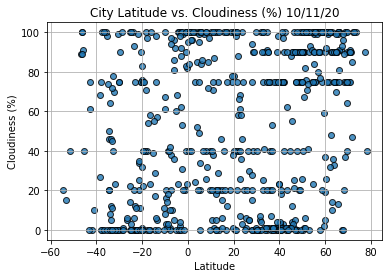

In [17]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

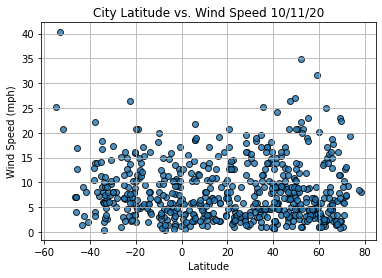

In [18]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime('%x'))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    print(r_value)

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

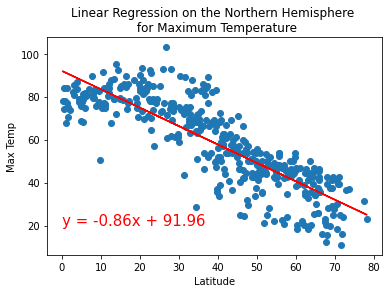

-0.8475222588491717


In [22]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (0,20))

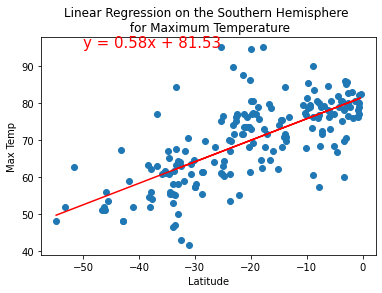

0.7046381099532039


In [23]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-50,95))

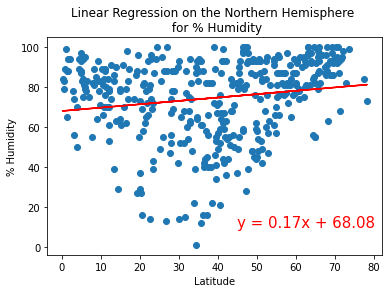

0.16907288972253176


In [24]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (45,10))

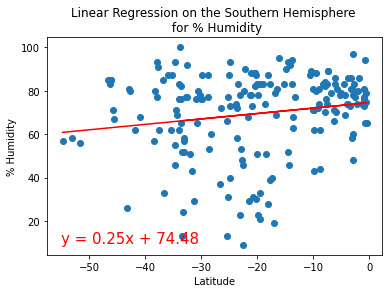

0.17190451887689814


In [25]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-55,10))

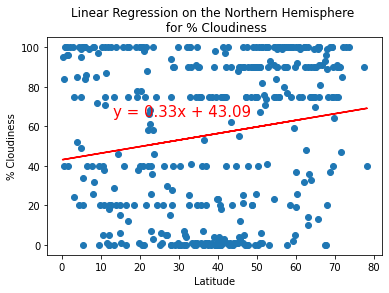

0.17297591337983054


In [26]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (13,65))

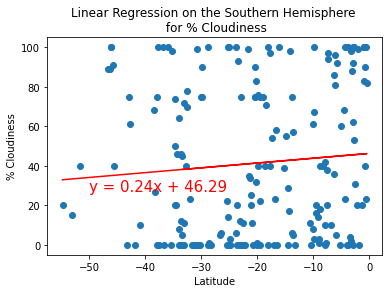

0.08506104806547396


In [27]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-50,27))

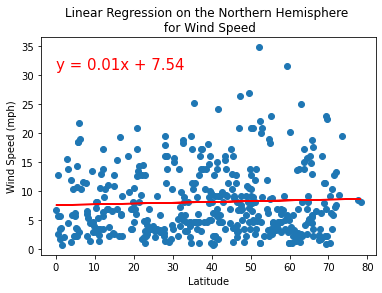

0.046213452599393474


In [28]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (0,31))

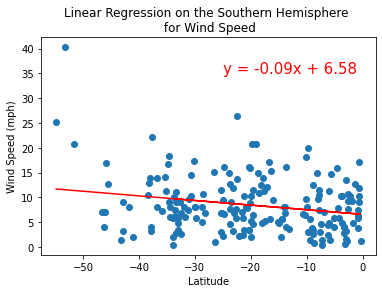

-0.2217450321560872


In [29]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)', (-25,35))